In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from pypalettes import load_cmap
from pyfonts import load_bunny_font, set_default_font

In [2]:
# Load font
font = load_bunny_font("Dosis")
set_default_font(font)

In [3]:
roundabouts_clean = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-12-16/roundabouts_clean.csv")

In [4]:
# Filter countries for Portugal
pt = roundabouts_clean[roundabouts_clean["country"] == "Portugal"]

In [5]:
pt1 = pt.copy()

In [6]:
# Replace Nan values 
pt1["state_region"] = pt1["state_region"].fillna("Açores")

In [7]:
# Count roundabouts per district
pt2 =pt1["state_region"].value_counts().reset_index()

In [8]:
# Add additional data
add_data = {"state_region":["Braga", "Bragança", "Viseu", "Guarda", "Castelo Branco", "Portalegre", "Beja", "Madeira"],
            "count": [0, 0, 0, 0, 0, 0, 0, 0],            
             }

pt3 = pd.DataFrame(add_data)

In [9]:
# Concat dataframes
df = pd.concat([pt2, pt3], ignore_index=True)

In [10]:
# Remove trailing white spaces 
df["state_region"] = df["state_region"].str.strip()

In [11]:
df

,state_region,count
0,Lisbon,61
1,Setúbal,42
2,Açores,12
3,Faro,9
4,Coimbra,8
5,Vila Real,4
6,Porto,3
7,Évora,3
8,Viana do Castelo,2
9,Santarém,2


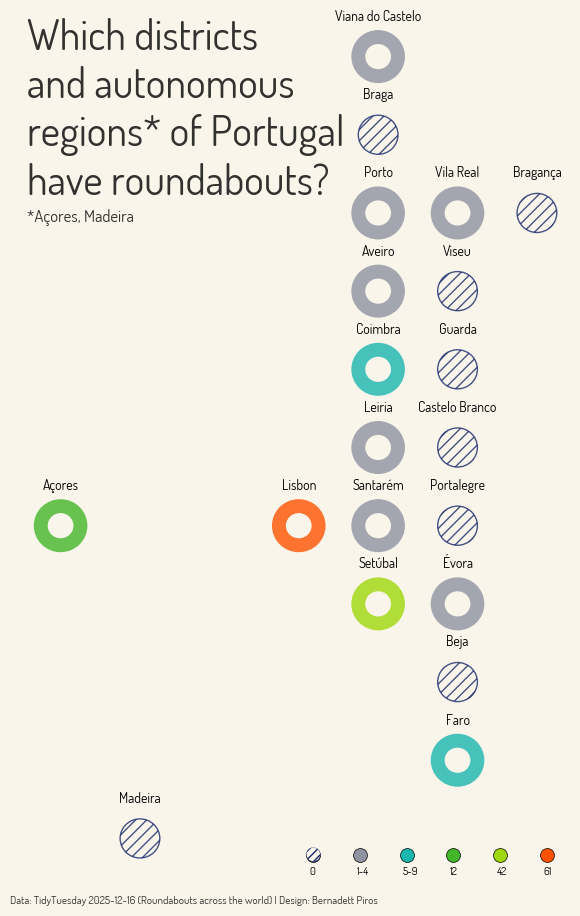

In [12]:
# Load cmap
cmap = load_cmap("Mango")  

# Grid setup
nrows, ncols = 11, 7
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(7, 11))
axs = axs  # 2D array

# Axes to remove
rows_to_remove = [
    (0,0), (0,1), (0,2), (0,3),        (0,5), (0,6),
    (1,0), (1,1), (1,2), (1,3),        (1,5), (1,6),
    (2,0), (2,1), (2,2), (2,3), 
    (3,0), (3,1), (3,2), (3,3),               (3,6),
    (4,0), (4,1), (4,2), (4,3),               (4,6), 
    (5,0), (5,1), (5,2), (5,3),               (5,6),
           (6,1), (6,2),                      (6,6),
    (7,0), (7,1), (7,2), (7,3),               (7,6),
    (8,0), (8,1), (8,2), (8,3), (8,4),        (8,6),
    (9,0), (9,1), (9,2), (9,3), (9,4),        (9,6),
    (10,0),       (10,2),(10,3),(10,4),(10,5),(10,6)    
]

# District labels
district_names = ["Viana do Castelo",
                  "Braga",
                  "Porto", "Vila Real", "Bragança",
                  "Aveiro", "Viseu",
                  "Coimbra", "Guarda",
                  "Leiria", "Castelo Branco",
                  "Açores", "Lisbon", "Santarém", "Portalegre",
                  "Setúbal", "Évora",
                  "Beja",
                  "Faro",
                  "Madeira"]

# Iteare over each ax
district = 0
for row in range(nrows):
    for col in range(ncols):
        
        # Remove specific rows and close their axes
        if (row, col) in rows_to_remove:
            axs[row, col].axis("off")
        
        # All axes to keep
        else:
            
            # Remove axis labels
            axs[row, col].set_xticks([])
            axs[row, col].set_yticks([])
            
            # Add district's letters
            names = district_names[district]
            axs[row, col].text(0.5, 1.05, names, fontsize=10, ha="center")
            district += 1            

            # Filter on state_region data
            district_data = df[df["state_region"]==names]                 

            # Map edgecolors
            for st in district_data["state_region"]:
                if st == "Lisbon":
                    edgecolor = cmap.colors[0]  
                elif st == "Setúbal":
                    edgecolor = cmap.colors[1]
                elif st == "Açores":
                    edgecolor = cmap.colors[2]
                elif st in ["Faro", "Coimbra"]:
                    edgecolor = cmap.colors[3]
                elif st in ["Vila Real", "Porto", "Évora", "Viana do Castelo", "Santarém", "Leiria", "Aveiro"]:
                    edgecolor = cmap.colors[4]
                else:
                    edgecolor = cmap.colors[5]

            # Create circles with mapped edgecolors
            for i, value in enumerate(district_data["count"]):

                my_circle = patches.Circle(
                    xy=(0.5, 0.5),
                    radius=0.3,
                    alpha=0.8,
                    hatch = "///" if value == 0 else None,
                    facecolor="#F9F5EB",  
                    edgecolor=edgecolor,   
                    lw=1 if value==0 else 10
                    )

                axs[row, col].add_patch(my_circle)      
                axs[row, col].axis("off")
            
# Legend
child_ax = fig.add_axes([0.5, 0.1, 0.4, 0.05])  
child_ax.set_facecolor("#65815D")
child_ax.set_xlim(0, 1.2)
x = [0.1, 0.3, 0.5, 0.7, 0.9, 1.1]
y = [0.75] * 6
c = cmap.colors[::-1] # Reverse edgecolors
t = ["61", "42", "12", "5-9", "1-4", "0"][::-1] # Reverse labels
for i in range(len(x)):
    child_ax.scatter(x[i], y[i], s=100, c=c[i], ec="black", lw=0.5)  
    child_ax.text(x[i]-0.015, y[i]-0.03, s=t[i], fontsize=8)
child_ax.scatter(x[0], y[0], s=100, c="#F9F5EB", ec="#172869", hatch="////", lw=0.2)
child_ax.axis("off")

# Add title
fig.text(0.125, 0.725, "Which districts\nand autonomous\nregions* of Portugal\nhave roundabouts?", size=30, alpha=0.8)
fig.text(0.125, 0.7, "*Açores, Madeira", size=12, alpha=0.8)

# Backgroundcolor
fig.set_facecolor("#F9F5EB") 

# Add caption
fig.text(0.1, 0.08, "Data: TidyTuesday 2025-12-16 (Roundabouts across the world) | Design: Bernadett Piros", size=8, alpha=0.8)

# Show the plot    
plt.show()

#fig.savefig("2025-12-16.png", bbox_inches="tight", pad_inches=0.2)